# Random regular hypergraphs

### Algorithm to generate a $(kq, q)$-regular hypergraph as described in Appendix A of [[arxiv:2007.13837]](https://arxiv.org/abs/2007.13837)

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

**Algorithm:** <br>
    
Initialize $\ell = \{1, 1, 1, 2, 2, 2, . . . , N, N, N\}$ where each integer $1, . . . , N$ appears exactly $kq$ times <br>
Initialize empty list to store hyperedges $E = \{\}$ <br>
for $n = 1, \, n < 2N$ (or more):  <br>
&nbsp;&nbsp;&nbsp;&nbsp; Sample $q$ elements from $\ell$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; if sample has no duplicates and it is not already in $E$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Move sample to $E$; <br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Remove sample from $\ell$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; end <br>
&nbsp;&nbsp;&nbsp;&nbsp; $n \leftarrow n + 1$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; end <br>
    
If at the end $\ell$ is empty, then $E$ gives a list of hyperedges for a $(k q, q)$-regular hypergraph.
</div>

### Recall some definitions:

- A hypergraph $H = (V, E)$ consists of a set $V$ of vertices and a set $E$ of hyperedges such that each hyperedge is a nonempty subset of $V$ .
- A hypergraph $H$ is $q$-uniform for an integer $q \geq 2$ if every hyperedge $h \in E$ contains exactly $q$ vertices.
- The degree of the vertex $i$, denoted deg$(i)$, is the number of all hyperedges incident to $i$.
- A hypergraph is $r$-regular if all of its vertices have degree $r$.
- A hypergraph is $(r, q)$-regular if it is both $r$-regular and $q$-uniform.
- A $s$-uniform hypergraph is complete if the edge set is the set of all selement subsets of vertices.


### Implementation of the algorithm

In [1]:
import numpy as np
from random import sample, seed
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import hypernetx as hnx

In [2]:
# Return True if list x has repeated elements
def duplicates(x):
    return any(x.count(element) > 1 for element in x)

# Return True if x is a list contained in X, where X is a list of lists
def repeated_group(x, X): 
    for y in X:
        if set(y) == set(x): 
            return True
    return False

# Need to satisfy a) each group does not include repeated indices b) there are no repeated groups
# If two conditions are satisfied, put indices from L into first list of E
def regular_hypergraph_try(N, k, q):

    L = list(np.array([[i] * int(k * q) for i in range(N)]).flatten()) # List including each vertex index kq times
    E = [[], L] # Store hyperedges in E[0]
    
    for j in range(int(k * q * N)):
        if (len(L) >= q):
            h =  sample(L, q)
            if duplicates(h) == False and repeated_group(h, E[0]) == False:
                for i in h:
                    L.remove(i)
                E[0].append(h)
    return E

# Run regular_hypergraph_try until L is empty to obtain a regular hypergraph
def regular_hypergraph(N, k, q, random_seed):
   
    seed(random_seed)
    count = 0 
    E = regular_hypergraph_try(N, k, q)
    
    while E[1] != [] and count < 10000:
        E = regular_hypergraph_try(N, k, q)
        
    hypergraph = np.sort(E[0]) # organize vertex indices in increasing order
    hypergraph = tuple(map(tuple, hypergraph)) # Convert to list
    
    return hypergraph

### Regular hypergraph example

In [3]:
N = 16      # Number of vertices
q = 4       # q-uniform
k = 1       # kq-regular
random_seed = 0

# Generate hypergraph
hyperedges = regular_hypergraph(N, k, q, random_seed)
print(hyperedges)

((1, 8, 12, 13), (5, 7, 13, 14), (3, 6, 9, 10), (1, 2, 5, 15), (5, 11, 12, 15), (2, 3, 6, 13), (1, 8, 11, 14), (2, 8, 9, 11), (6, 7, 14, 15), (0, 5, 12, 14), (0, 11, 12, 13), (4, 6, 9, 15), (0, 7, 8, 10), (1, 2, 4, 7), (3, 4, 9, 10), (0, 3, 4, 10))


## Hypergraph visualization using [NetworkX](https://networkx.org/)

As a simple way to visualize hypergraphs, we can replace each hyperedge by a complete list of edges

E.g.: $(1, 3, 13, 15) \mapsto ((1, 3),\, (1, 13),\, (1, 15),\, (3, 13),\, (3, 15),\, (13, 15))$

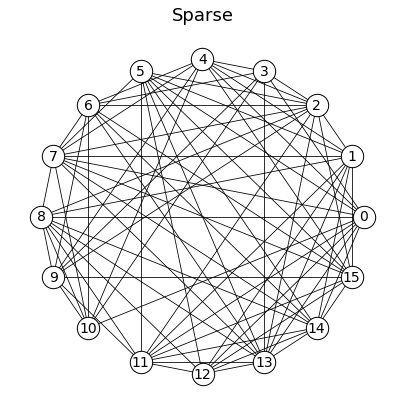

In [4]:
G = nx.Graph()
nodes = np.arange(N)
G.add_nodes_from(nodes)

for x in hyperedges:
    edges = list(combinations(x, 2)) 
    G.add_edges_from(edges)

options = {
    'node_color': 'white',
    'node_size': 500,
    'width': 0.8,
    'edgecolors': 'black',
    'linewidths': 1,
    'font_size': 14
}
    
plt.figure(figsize=(7, 7))
plt.title('Sparse', fontsize=18)
nx.draw_circular(G, with_labels=True, **options)
# plt.savefig('plots/graph_sparse.png', bbox_inches='tight', dpi=200)

### All-to-all (fully connected) Hypergraph

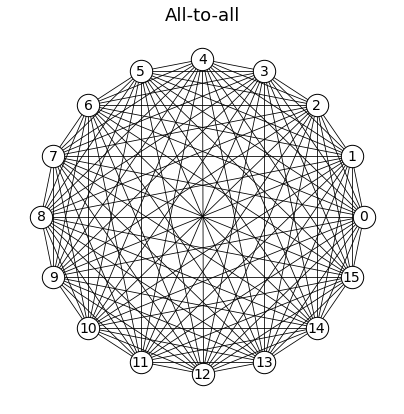

In [5]:
G = nx.Graph()
nodes = np.arange(N)
G.add_nodes_from(nodes)

hyperedges_all = tuple([i for i in combinations(np.arange(N), q)])

for x in hyperedges_all:
    edges = list(combinations(x, 2)) 
    G.add_edges_from(edges)
    
plt.figure(figsize=(7, 7))
plt.title('All-to-all', fontsize=18)
nx.draw_circular(G, with_labels=True, **options)
# plt.savefig('plots/graph_all-to-all.png', bbox_inches = 'tight', dpi=200)

## Hypergraph visualization using [HyperNetX](https://pnnl.github.io/HyperNetX/build/index.html)

Alternatively, we can visualize each hyperedge with a different 'color'. HyperNetX makes use of predefined [layouts from NetworkX](https://networkx.org/documentation/stable/reference/drawing.html#)


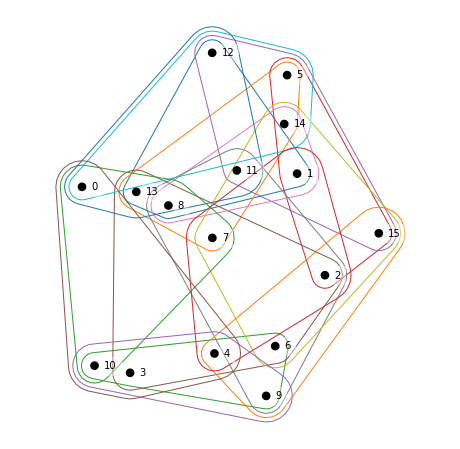

In [6]:
# Sparse hypergraph
H = hnx.Hypergraph(hyperedges)

hnx.draw(H, 
         layout=nx.drawing.layout.kamada_kawai_layout,
         with_edge_labels=False, 
         with_node_labels=True)

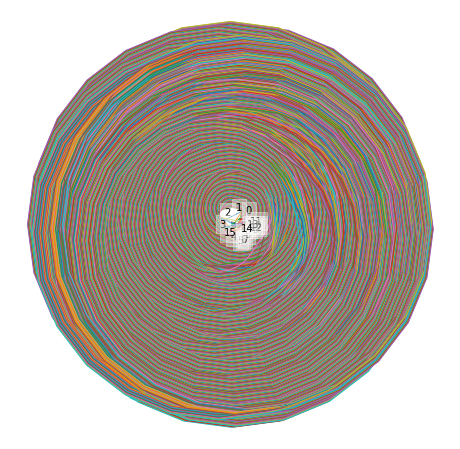

In [7]:
# Ok... Not a good idea
H_all = hnx.Hypergraph(hyperedges_all)

hnx.draw(H_all, 
         layout=nx.drawing.layout.kamada_kawai_layout,
         with_edge_labels=False, 
         with_node_labels=True)